# Importing the libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy

# Defining pandas configuration
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_colwidth", None)

# Setting style for plots
sns.set_style("whitegrid")

# 1. Reading the dataset

In [2]:
emp_turnover_xls = pd.ExcelFile("Sequoia_Data_Science_Case_Study_Dataset.xls")

# Available sheets in the xls file
emp_turnover_xls.sheet_names

['SequoiaDataScientist_Dataset', 'DataDescription']

In [3]:
emp_turnover_df = pd.read_excel("Sequoia_Data_Science_Case_Study_Dataset.xls", sheet_name="SequoiaDataScientist_Dataset")

display(emp_turnover_df.head())

,Age,Turnover,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
data_desc_df = pd.read_excel("Sequoia_Data_Science_Case_Study_Dataset.xls", sheet_name="DataDescription")

display(data_desc_df)

,Column name,Description
0,Age,The age of the employee. (Numerical)
1,TurnOver,Whether or not the employee has left the organization. (Categorical)
2,BusinessTravel,The frequency of business travel for the employee. (Categorical)
3,DailyRate,The daily rate of pay for the employee. (Numerical)
4,Department,The department the employee works in. (Categorical)
5,DistanceFromHome,The distance from home in miles for the employee. (Numerical)
6,Education,The level of education achieved by the employee. (Categorical)
7,EducationField,The field of study for the employee's education. (Categorical)
8,EmployeeCount,The total number of employees in the organization. (Numerical)
9,EmployeeNumber,A unique identifier for each employee profile. (Numerical)


## Inspecting dataset shape

In [5]:
emp_turnover_df.shape

(1470, 35)

In [6]:
emp_turnover_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Turnover                  1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# 2. Pre-requisites for hypothesis testing

In [7]:
alpha = 0.05

In [8]:
def decide_variance_equality(p_value, alpha):
    if p_value > alpha:
        print("Variances are equal")
    
    elif p_value < alpha:
        print("Variances are not equal")

In [9]:
def decide_hypothesis(p_value, alpha):
    if p_value > alpha:
        print("Fail to reject the null hypothesis")
    
    elif p_value < alpha:
        print("Rejecting null hypothesis")

# 3. EDA

## i. Checking the cardinality of the columns

In [10]:
def unique_value_count(df: pd.DataFrame):
    df_nunique = df.nunique().reset_index()
    df_nunique["dtype"] = df.dtypes.reset_index().loc[:, 0]
    df_nunique.columns = ["column", "nunique", "dtype"]
    
    return df_nunique

In [11]:
df_cardinality = unique_value_count(df=emp_turnover_df)

display(df_cardinality)

,column,nunique,dtype
0,Age,43,int64
1,Turnover,2,object
2,BusinessTravel,3,object
3,DailyRate,886,int64
4,Department,3,object
5,DistanceFromHome,29,int64
6,Education,5,int64
7,EducationField,6,object
8,EmployeeCount,1,int64
9,EmployeeNumber,1470,int64


In [12]:
unwanted_cols_df = df_cardinality.loc[df_cardinality["nunique"].isin([1])]

display(unwanted_cols_df)

,column,nunique,dtype
8,EmployeeCount,1,int64
21,Over18,1,object
26,StandardHours,1,int64


In [13]:
emp_turnover_df = emp_turnover_df.drop(columns=unwanted_cols_df["column"])

display(emp_turnover_df.head())

,Age,Turnover,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


## a. Analyzing turnover for employee attributes

### 1. Is turnover dependent on age?

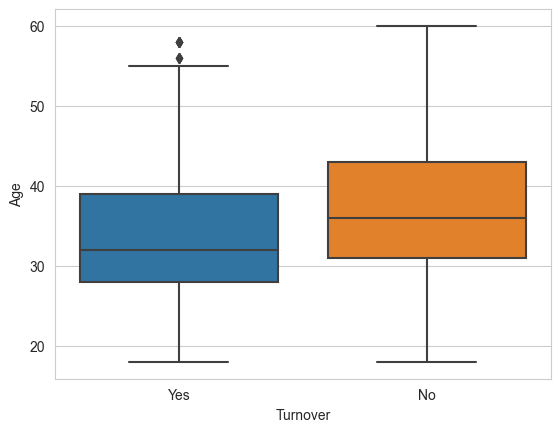

In [14]:
sns.boxplot(
    x="Turnover",
    y="Age",
    data=emp_turnover_df
)

plt.show()

**Observation:** Employees in their early 30s are more likely to leave the company

#### Proving statistically

$H_0$: $\mu_1 = \mu_2$ ("There is no difference in the mean of age of the employees turnover")

$H_1$: $\mu_1 \neq \mu_2$ ("There is a difference in the mean of age of the employees turnover")

In [15]:
# Taking out the samples
turnover = emp_turnover_df.loc[emp_turnover_df["Turnover"] == "Yes", "Age"]
not_turnover = emp_turnover_df.loc[emp_turnover_df["Turnover"] == "No", "Age"]

In [16]:
stat, p_value_levene = scipy.stats.levene(
    turnover,
    not_turnover,
    center="mean"
)

print(f"stat: {stat}, p-value: {p_value_levene}")

decide_variance_equality(p_value_levene, alpha)

stat: 1.1583170677572885, p-value: 0.2819916793250208
Variances are equal


In [17]:
t_statistics, p_value = scipy.stats.ttest_ind(
    turnover,
    not_turnover,
    equal_var=True
)

print(f"t-statistic: {t_statistics}, p-value: {p_value}")

decide_hypothesis(p_value, alpha)

t-statistic: -6.178663835307217, p-value: 8.356308021103587e-10
Rejecting null hypothesis


### 2. Is Gender impacts the turnover?

In [18]:
turnover_by_gender = pd.DataFrame(
    np.round(100*(emp_turnover_df.groupby(["Turnover", "Gender"])["EmployeeNumber"].count() / \
    emp_turnover_df.groupby(["Gender"])["EmployeeNumber"].count()), 2))

turnover_by_gender.columns = ["%"]

display(turnover_by_gender)

%
Turnover Gender       
No       Female  85.20
         Male    82.99
Yes      Female  14.80
         Male    17.01

**Observation:** Turnover for Males are higher than Females.

### 3. Descriptive stats of age by department for turnover

In [19]:
# Calculating summary statistics
dept_age_turnover = emp_turnover_df.groupby(["Turnover", "Department"])["Age"].describe().reset_index()

# Calculating count by department
cnt_by_dept = emp_turnover_df["Department"].value_counts().reset_index()
cnt_by_dept.columns = ["Department", "Total"]

# Merging the total values and sorting the dataframe
dept_age_turnover_mrgd = dept_age_turnover \
    .merge(cnt_by_dept, on="Department") \
    .sort_values(by=["Turnover", "Department"])

# Calculating turnover rate
dept_age_turnover_mrgd["%"] = np.round(dept_age_turnover_mrgd["count"]*100 / dept_age_turnover_mrgd["Total"], 2)

# Setting Turnover and Department as the index
dept_age_turnover_mrgd = dept_age_turnover_mrgd.set_index(["Turnover", "Department"])

# Defining output column order
cols_order = ["count", "%"] + dept_age_turnover_mrgd.columns[1:-2].to_list()

# cols_order
dept_age_turnover_mrgd = dept_age_turnover_mrgd[cols_order]

display(dept_age_turnover_mrgd)

count      %       mean       std   min  \
Turnover Department                                                        
No       Human Resources          51.0  80.95  39.627451  8.849770  24.0   
         Research & Development  828.0  86.16  37.615942  8.931681  18.0   
         Sales                   354.0  79.37  37.135593  8.771169  18.0   
Yes      Human Resources          12.0  19.05  30.083333  6.584532  19.0   
         Research & Development  133.0  13.84  33.473684  9.902233  18.0   
         Sales                    92.0  20.63  34.260870  9.690677  18.0   

                                  25%   50%    75%   max  
Turnover Department                                       
No       Human Resources         33.5  39.0  44.50  59.0  
         Research & Development  31.0  36.0  43.25  60.0  
         Sales                   31.0  36.0  42.75  60.0  
Yes      Human Resources         26.0  29.5  34.00  44.0  
         Research & Development  28.0  31.0  38.00  58.0  
         Sales                   28.0  32.5  41.00  55.0

**Observations:**

* In the given dataset, the HR department has the least number of participants
* R&D has the most participants followed by Sales
* Sales department has the highest turnover
* The average of turnover for these departments lie between 30-35.
* The median age say that in their early 30s employees are most likely to leave the company
* It is interesting to see that people are even leaving the organization in their 40s and 50s. It might be that they are taking the volunteer retirement.

---

**Prescriptive Analytics:**

* Organization should focus more on the employees in their early 30s for all the departments
* Generally people in their 30s are looking for better remuneration. The organization might need to revise the salary structure.
* Conducting the survey for these employees and having 1:1 sessions might help out in understanding the turnover

### 4. Descriptive stats of age by department and job role for turnover

In [20]:
# Calculating summary statistics
dept_job_role_age_turnover = emp_turnover_df.groupby(["Turnover", "Department", "JobRole"])["Age"].describe().reset_index()

# Calculating count by department and job role
cnt_by_dept_job_role = emp_turnover_df[["Department", "JobRole"]].value_counts().reset_index()
cnt_by_dept_job_role.columns = ["Department", "JobRole", "Total"]

# Merging the total values and sorting the dataframe
dept_job_role_age_turnover_mrgd = dept_job_role_age_turnover \
    .merge(cnt_by_dept_job_role, on=["Department", "JobRole"]) \
    .sort_values(by=["Turnover", "Department", "JobRole"])

# Calculating turnover rate
dept_job_role_age_turnover_mrgd["%"] = np.round(dept_job_role_age_turnover_mrgd["count"]*100 / dept_job_role_age_turnover_mrgd["Total"], 2)

# Setting Turnover and Department as the index
dept_job_role_age_turnover_mrgd = dept_job_role_age_turnover_mrgd.set_index(["Turnover", "Department", "JobRole"])

# Defining output column order
cols_order = ["count", "%"] + dept_job_role_age_turnover_mrgd.columns[1:-2].to_list()

# cols_order
dept_job_role_age_turnover_mrgd = dept_job_role_age_turnover_mrgd[cols_order]

display(dept_job_role_age_turnover_mrgd)

count       %  \
Turnover Department             JobRole                                    
No       Human Resources        Human Resources             40.0   76.92   
                                Manager                     11.0  100.00   
         Research & Development Healthcare Representative  122.0   93.13   
                                Laboratory Technician      197.0   76.06   
                                Manager                     51.0   94.44   
                                Manufacturing Director     135.0   93.10   
                                Research Director           78.0   97.50   
                                Research Scientist         245.0   83.90   
         Sales                  Manager                     35.0   94.59   
                                Sales Executive            269.0   82.52   
                                Sales Representative        50.0   60.24   
Yes      Human Resources        Human Resources             12.0   23.08   
         Research & Development Healthcare Representative    9.0    6.87   
                                Laboratory Technician       62.0   23.94   
                                Manager                      3.0    5.56   
                                Manufacturing Director      10.0    6.90   
                                Research Director            2.0    2.50   
                                Research Scientist          47.0   16.10   
         Sales                  Manager                      2.0    5.41   
                                Sales Executive             57.0   17.48   
                                Sales Representative        33.0   39.76   

                                                                mean  \
Turnover Department             JobRole                                
No       Human Resources        Human Resources            37.125000   
                                Manager                    48.727273   
         Research & Development Healthcare Representative  39.877049   
                                Laboratory Technician      34.944162   
                                Manager                    46.019608   
                                Manufacturing Director     38.222222   
                                Research Director          43.858974   
                                Research Scientist         34.567347   
         Sales                  Manager                    47.285714   
                                Sales Executive            36.758364   
                                Sales Representative       32.060000   
Yes      Human Resources        Human Resources            30.083333   
         Research & Development Healthcare Representative  38.888889   
                                Laboratory Technician      31.403226   
                                Manager                    45.000000   
                                Manufacturing Director     39.300000   
                                Research Director          49.500000   
                                Research Scientist         32.510638   
         Sales                  Manager                    48.500000   
                                Sales Executive            37.508772   
                                Sales Representative       27.787879   

                                                                 std   min  \
Turnover Department             JobRole                                      
No       Human Resources        Human Resources             7.643289  24.0   
                                Manager                     6.900593  40.0   
         Research & Development Healthcare Representative   8.135808  24.0   
                                Laboratory Technician       8.023049  18.0   
                                Manager                     7.075281  30.0   
                                Manufacturing Director      8.443550  22.0   
                             

**Observations:**

* There is no turnover for Managers from HR department
* HRs from HR department have a mean age of turnover 30. As discussed in the previous analysis people in their early 30s are most likely to leave.
* Lab Technician and Research Scientist from R&D are highly likely to leave in their early 30s.
   * For other job roles in this department looks like people are looking forward to the stability
   * Maybe that's why their mean age is more than 38.
* Sales Rep have a highest turnover rate in Sales department and also mean age is less. Maybe the target SLA is too strict.
* Managers and Directors have less turnover rate for all the departments

### 5. Is the employee turnover dependent on the distance from home?

In [21]:
# Calculating summary statistics
job_role_distance_turnover = emp_turnover_df.groupby(["Turnover", "Department", "JobRole"])["DistanceFromHome"].describe().reset_index()

# Calculating count by department and job role
cnt_by_dept_job_role = emp_turnover_df[["Department", "JobRole"]].value_counts().reset_index()
cnt_by_dept_job_role.columns = ["Department", "JobRole", "Total"]

# Merging the total values and sorting the dataframe
job_role_distance_turnover_mrgd = job_role_distance_turnover \
    .merge(cnt_by_dept_job_role, on=["Department", "JobRole"]) \
    .sort_values(by=["Turnover", "Department", "JobRole"])

# Calculating turnover rate
job_role_distance_turnover_mrgd["%"] = np.round(job_role_distance_turnover_mrgd["count"]*100 / job_role_distance_turnover_mrgd["Total"], 2)

# Setting Turnover and Department as the index
job_role_distance_turnover_mrgd = job_role_distance_turnover_mrgd.set_index(["Turnover", "Department", "JobRole"])

# Defining output column order
cols_order = ["count", "%"] + job_role_distance_turnover_mrgd.columns[1:-2].to_list()

# cols_order
job_role_distance_turnover_mrgd = job_role_distance_turnover_mrgd[cols_order]

display(job_role_distance_turnover_mrgd)

count       %  \
Turnover Department             JobRole                                    
No       Human Resources        Human Resources             40.0   76.92   
                                Manager                     11.0  100.00   
         Research & Development Healthcare Representative  122.0   93.13   
                                Laboratory Technician      197.0   76.06   
                                Manager                     51.0   94.44   
                                Manufacturing Director     135.0   93.10   
                                Research Director           78.0   97.50   
                                Research Scientist         245.0   83.90   
         Sales                  Manager                     35.0   94.59   
                                Sales Executive            269.0   82.52   
                                Sales Representative        50.0   60.24   
Yes      Human Resources        Human Resources             12.0   23.08   
         Research & Development Healthcare Representative    9.0    6.87   
                                Laboratory Technician       62.0   23.94   
                                Manager                      3.0    5.56   
                                Manufacturing Director      10.0    6.90   
                                Research Director            2.0    2.50   
                                Research Scientist          47.0   16.10   
         Sales                  Manager                      2.0    5.41   
                                Sales Executive             57.0   17.48   
                                Sales Representative        33.0   39.76   

                                                                mean  \
Turnover Department             JobRole                                
No       Human Resources        Human Resources             6.600000   
                                Manager                    11.181818   
         Research & Development Healthcare Representative   9.204918   
                                Laboratory Technician       9.329949   
                                Manager                     6.686275   
                                Manufacturing Director      9.533333   
                                Research Director           8.474359   
                                Research Scientist          8.869388   
         Sales                  Manager                     8.714286   
                                Sales Executive             9.026022   
                                Sales Representative        9.000000   
Yes      Human Resources        Human Resources            13.416667   
         Research & Development Healthcare Representative  17.666667   
                                Laboratory Technician       9.661290   
                                Manager                    15.333333   
                                Manufacturing Director      8.800000   
                                Research Director           7.000000   
                                Research Scientist          9.765957   
         Sales                  Manager                     2.000000   
                                Sales Executive            12.649123   
                                Sales Representative        8.151515   

                                                                 std  min  \
Turnover Department             JobRole                                     
No       Human Resources        Human Resources             6.934862  1.0   
                                Manager                     9.958094  1.0   
         Research & Development Healthcare Representative   7.989599  1.0   
                                Laboratory Technician       8.101887  1.0   
                                Manager                     6.877471  1.0   
                                Manufacturing Director      8.725328  1.0   
                                Resea

**Observations:**

* HRs who left the ogranization used to live far from the workplace
* Similar behavior observed in the R&D department for Healthcare Representative, Manager, and Research Scientist
* For Sales Executive looks like the distance factor is having a direct impact on the turnover
* But in the case of Manager and Sales Rep the story is different. They might prefer business travel.

### 6. Turnover rate of employees by department and education field

In [22]:
# Getting the count by department and education field
edu_field_dept_turnover = emp_turnover_df.groupby(
    ["Turnover", "Department", "EducationField"]
)["EmployeeNumber"].agg(["count"]).reset_index()

# Overall count by department and education field
cnt_by_dept_edu_field = emp_turnover_df[["Department", "EducationField"]].value_counts().reset_index()
cnt_by_dept_edu_field.columns = ["Department", "EducationField", "Total"]

# Merging the total values and sorting the dataframe
edu_field_turnover_mrgd = edu_field_dept_turnover \
    .merge(cnt_by_dept_edu_field, on=["Department", "EducationField"]) \
    .sort_values(by=["Turnover", "Department", "EducationField"])

# Calculating turnover rate
edu_field_turnover_mrgd["%"] = np.round(edu_field_turnover_mrgd["count"]*100 / edu_field_turnover_mrgd["Total"], 2)

# Setting Turnover and Department as the index
edu_field_turnover_mrgd = edu_field_turnover_mrgd.set_index(["Turnover", "Department", "EducationField"])

# Defining output column order
cols_order = ["count", "%"]

# cols_order
edu_field_turnover_mrgd = edu_field_turnover_mrgd[cols_order]

display(edu_field_turnover_mrgd)

count       %
Turnover Department             EducationField                 
No       Human Resources        Human Resources      20   74.07
                                Life Sciences        15   93.75
                                Medical              11   84.62
                                Other                 3  100.00
                                Technical Degree      2   50.00
         Research & Development Life Sciences       381   86.59
                                Medical             316   87.05
                                Other                57   89.06
                                Technical Degree     74   78.72
         Sales                  Life Sciences       121   80.67
                                Marketing           124   77.99
                                Medical              74   84.09
                                Other                11   73.33
                                Technical Degree     24   70.59
Yes      Human Resources        Human Resources       7   25.93
                                Life Sciences         1    6.25
                                Medical               2   15.38
                                Technical Degree      2   50.00
         Research & Development Life Sciences        59   13.41
                                Medical              47   12.95
                                Other                 7   10.94
                                Technical Degree     20   21.28
         Sales                  Life Sciences        29   19.33
                                Marketing            35   22.01
                                Medical              14   15.91
                                Other                 4   26.67
                                Technical Degree     10   29.41

**Observations:**

* In R&D department the education field has no employee from HR background and this was expected
* It is interesting to see that the HR and Sales department have employees from diverse education background such as Life Science, Medical and even the Technical Degree
* In R&D department the Technical Degree employees have highest turnover rate and the same has been observed for the Sales department
* Looks like the Technical Degree employees used to look for the better opportunities
* In HR department the HR background employees are highly likely to leave the organization